In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Obtendo os dados
file_data = "20191004.csv"
file_ambiente = "ambientais-ufms"
file_inversor = "inversor_1_ufms"
dados_ambiente = pd.read_csv("Data/ufms/"+file_ambiente+"-"+file_data)
dados_inversor = pd.read_csv("Data/ufms/"+file_inversor+"-"+file_data)


In [6]:
print(dados_ambiente)


      dia_mes_ano  hora_minuto  irr  massaPM1  massaPM2  massaPM4  massaPM10  \
0        20191004          100  0.0     11.37      0.38         0          0   
1        20191004          200  0.0     11.73      0.39         0          0   
2        20191004          300  0.0     12.27      0.41         0          0   
3        20191004          400  0.0     12.02      0.40         0          0   
4        20191004          500  0.0     10.96      0.36         0          0   
...           ...          ...  ...       ...       ...       ...        ...   
1430     20191004       235400  0.0      7.18      0.24         0          0   
1431     20191004       235500  0.0      7.62      0.25         0          0   
1432     20191004       235600  0.0      8.20      0.27         0          0   
1433     20191004       235700  0.0      8.57      0.29         0          0   
1434     20191004       235900  0.0      8.12      0.27         0          0   

      numPM1  numPM2  numPM4  numPM10  

In [6]:
print(dados_inversor)

      dia_mes_ano  hora_minuto  P_AC  I_AC  I_DC   V_AC   V_DC  IRR
0        20191004        52100     9  0.10  0.09  220.0  461.7    6
1        20191004        52200    12  0.10  0.10  220.1  440.0    6
2        20191004        52300    19  0.12  0.10  218.7  481.5    6
3        20191004        52400    27  0.15  0.12  218.8  466.9    7
4        20191004        52500    33  0.18  0.13  218.3  482.4    7
...           ...          ...   ...   ...   ...    ...    ...  ...
1114     20191004       235500     0  0.09  0.00  213.3   43.6    0
1115     20191004       235600     0  0.09  0.00  213.3   43.8    0
1116     20191004       235700     0  0.09  0.00  213.3   43.8    0
1117     20191004       235800     0  0.09  0.00  213.3   44.0    0
1118     20191004       235900     0  0.09  0.00  213.3   44.0    0

[1119 rows x 8 columns]


In [16]:
#Obtendo hora_mintuo da primeira e da última medida do inversor
primeira_hm_inversor = dados_inversor.hora_minuto[0]
print(primeira_hm_inversor)
ultima_hm_inversor = dados_inversor.hora_minuto[dados_inversor.shape[0]-1]
print(ultima_hm_inversor)

52100
235900


In [15]:
'''
Como podemos perceber, o tamanho dos dados de ambiente e do inversor são diferentes, nem sempre começam e terminam na mesma hora_minuto
Sendo assim temos que filtrar a medida de ambiente para conter as mesmas medidas do inversor
'''
#Obtendo hora_mintuo da primeira e da última medida do ambiente
dados_inversor.shape[0]
primeira_hm_ambiente = dados_ambiente.hora_minuto[0]
print(primeira_hm_ambiente)
ultima_hm_ambiente = dados_ambiente.hora_minuto[dados_ambiente.shape[0]-1]
print(ultima_hm_ambiente)


100
235900


In [18]:
selecao = dados_ambiente["hora_minuto"] >= primeira_hm_inversor
dados2 = dados_ambiente[selecao]
print(dados2)

      dia_mes_ano  hora_minuto  irr  massaPM1  massaPM2  massaPM4  massaPM10  \
318      20191004        52100  0.0      6.73      0.22         0          0   
319      20191004        52200  0.0      6.71      0.22         0          0   
320      20191004        52300  0.6      7.76      0.26         0          0   
321      20191004        52400  0.0      6.52      0.22         0          0   
322      20191004        52500  0.0      7.16      0.24         0          0   
...           ...          ...  ...       ...       ...       ...        ...   
1430     20191004       235400  0.0      7.18      0.24         0          0   
1431     20191004       235500  0.0      7.62      0.25         0          0   
1432     20191004       235600  0.0      8.20      0.27         0          0   
1433     20191004       235700  0.0      8.57      0.29         0          0   
1434     20191004       235900  0.0      8.12      0.27         0          0   

      numPM1  numPM2  numPM4  numPM10  

In [21]:
#Verificando se os IRR das duas tabelas coincidem
#52300  = 0.6
selecao = dados_ambiente["hora_minuto"] >= primeira_hm_inversor
dados2 = dados_ambiente[selecao]
print(dados_inversor[dados_inversor["hora_minuto"] == 72300])
print(dados_ambiente[dados_ambiente["hora_minuto"] == 72300])

     dia_mes_ano  hora_minuto  P_AC   I_AC  I_DC   V_AC   V_DC  IRR
122     20191004        72300  3615  16.75   6.5  215.8  566.6  403
     dia_mes_ano  hora_minuto     irr  massaPM1  massaPM2  massaPM4  \
440     20191004        72300  389.29      4.85      0.16         0   

     massaPM10  numPM1  numPM2  numPM4  numPM10  tamanho_medio   temp  \
440          0    40.0    0.11     0.0      0.0           0.43  30.25   

     vento_dir  vento_vel  rainfall  
440         90      11.97       0.0  


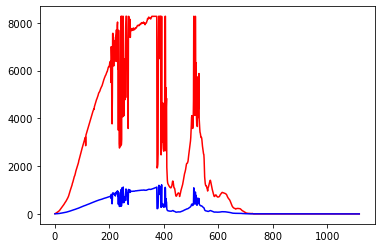

In [10]:

plt.plot(dados_inversor['P_AC'],color = "red") # printando a potência AC gerada
plt.plot(dados_inversor['IRR'],color = "blue") # Printando irr: solar irradiation (W/m2)